In [1]:
import sklearn
import csv
import pandas as pd
import numpy as np
import cv2

In [2]:
train = pd.read_csv('E:/Umang_clg/Sem6/AOBD/Group_Project/test_datasets/my_training_set.csv')
train = pd.DataFrame(train)
train.drop(['id'], axis=1,inplace=True)
train.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.121478,113,0,2,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,6,0
1,0.649902,113,0,2,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,6,0
2,1.623129,113,0,2,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,6,0
3,1.681642,113,3,2,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,6,0
4,0.449454,113,0,2,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,6,0


In [3]:
colName = list(train.columns.values)

In [4]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=train[colName[0:42]]  # Features
y=train['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [5]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [6]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9577400528486968


In [7]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


model = ExtraTreesClassifier()
model.fit(X_train,y_train)

#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization

imp = []

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
for i in range(0,5):
    imp.append(feat_importances.nlargest(5).index[i])
print(feat_importances)
plt.show()

C:\Users\umang\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


dur                  0.012293
proto                0.004178
service              0.011640
state                0.065049
spkts                0.003100
dpkts                0.022536
sbytes               0.014661
dbytes               0.005036
rate                 0.017251
sttl                 0.170923
dttl                 0.156637
sload                0.010338
dload                0.019268
sloss                0.004044
dloss                0.003529
sinpkt               0.023521
dinpkt               0.006170
sjit                 0.006127
djit                 0.006276
swin                 0.034609
stcpb                0.011863
dtcpb                0.025839
dwin                 0.018368
tcprtt               0.011556
synack               0.014041
ackdat               0.006491
smean                0.022059
dmean                0.027715
trans_depth          0.001208
response_body_len    0.001208
ct_srv_src           0.026551
ct_state_ttl         0.143128
ct_dst_ltm           0.017662
ct_src_dpo

<Figure size 640x480 with 1 Axes>

No handles with labels found to put in legend.


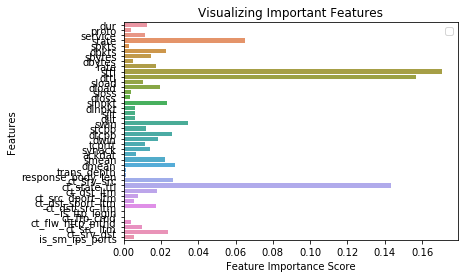

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feat_importances, y=feat_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Testing

In [10]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

imp_X=train[imp[0:21]]  # Features
imp_y=train['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(imp_X, imp_y, test_size=0.3) # 70% training and 30% test

In [11]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [12]:

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9318289831378439


In [14]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

accuracy = []
for j in range(1,41):
    imp_X=train[imp[0:j]]  # Features
    imp_y=train['label']  # Labels

    # Split dataset into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(imp_X, imp_y, test_size=0.3) # 70% training and 30% test
    
    #Create a Gaussian Classifier
    clf=RandomForestClassifier(n_estimators=100)

    #Train the model using the training sets y_pred=clf.predict(X_test)
    clf.fit(X_train,y_train)

    y_pred=clf.predict(X_test)
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    accuracy.append(metrics.accuracy_score(y_test, y_pred))
    


Accuracy: 0.9229891831264376
Accuracy: 0.9223048115126514
Accuracy: 0.9263920308727639
Accuracy: 0.9276467121647054
Accuracy: 0.931733931524818
Accuracy: 0.9324373134612094
Accuracy: 0.9333307986236526
Accuracy: 0.9331026747523905
Accuracy: 0.9324183031386043
Accuracy: 0.9316959108796077
Accuracy: 0.9323612721707888
Accuracy: 0.9320000760412904
Accuracy: 0.9331026747523905
Accuracy: 0.9320951276543163
Accuracy: 0.933368819268863
Accuracy: 0.9338630876565975
Accuracy: 0.9331216850749957
Accuracy: 0.9324563237838146
Accuracy: 0.9332927779784423
Accuracy: 0.9331977263654164
Accuracy: 0.9330076231393647
Accuracy: 0.9312776837822938
Accuracy: 0.9320761173317111
Accuracy: 0.9326464270098663
Accuracy: 0.9335589224949148
Accuracy: 0.9312586734596886
Accuracy: 0.9335589224949148
Accuracy: 0.9322091895899474
Accuracy: 0.9319050244282645
Accuracy: 0.9309545082980059
Accuracy: 0.9322091895899474
Accuracy: 0.9315628386213715
Accuracy: 0.9304032089424558
Accuracy: 0.9325133547516301
Accuracy: 0.9333

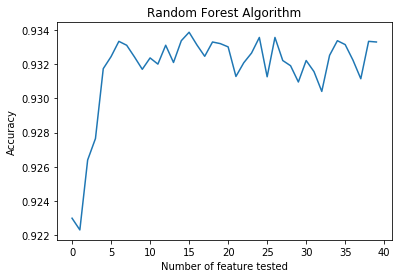

In [21]:
import matplotlib.pyplot as plt
plt.plot(accuracy)
# plt.axis([0, 45, 0.92, 0])
plt.title('Random Forest Algorithm')
plt.xlabel('Number of feature tested')
plt.ylabel('Accuracy')
plt.show()